In [1]:
import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt

In [2]:
class Region_Growing():

    def __init__(self, img, max_iter, threshold, conn=4):
        self.img = img
        self.segmentation = np.empty(shape=img.shape)
        self.segmentation.fill(255)
        self.max_iter_to_change_threshold = max_iter
        
        self.threshold = threshold
        self.seeds = [(1, 1)]
        if conn == 4:
            self.orientations = [(1, 0), (0, 1), (-1, 0), (0, -1)]
        elif conn == 8:
            self.orientations = [(1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1)]  # 8 connectivity
        else:
            raise ValueError("(%s) Connectivity type not known (4 or 8 available)!" % (sys._getframe().f_code.co_name))

    def segment(self):
        """
        Segment the image with the provided user seeds using region growing
        """
        for seed in self.seeds:
            curr_pixel = [seed[1], seed[0]]
            if self.segmentation[curr_pixel[0], curr_pixel[1]] == 0:
                continue  # pixel already explored
            contour = []
            seg_size = 1
            mean_seg_value = (self.img[curr_pixel[0], curr_pixel[1]])
            dist = 0
            iterations = 0
            while dist < self.threshold:
                if iterations > self.max_iter_to_change_threshold and self.threshold != 2.5:
                    return 0
                # Include current pixel in segmentation
                self.segmentation[curr_pixel[0], curr_pixel[1]] = 0
                # Explore neighbours of current pixel
                contour = self.explore_neighbours(contour, curr_pixel)
                # Get the nearest neighbour
                nearest_neighbour_idx, dist = self.get_nearest_neighbour(contour, mean_seg_value)
                # If no more neighbours to grow, move to the next seed
                if nearest_neighbour_idx == -1 : break
                # Update Current pixel to the nearest neighbour and increment size
                curr_pixel = contour[nearest_neighbour_idx]
                seg_size += 1
                # Update Mean pixel value for segmentation
                mean_seg_value = (mean_seg_value * seg_size + float(self.img[curr_pixel[0], curr_pixel[1]])) / (
                        seg_size + 1)
                # Delete from contour once the nearest neighbour as chosen as the current node for expansion
                iterations += 1
                del contour[nearest_neighbour_idx]
        return self.segmentation

    def display_and_resegment(self, name="Region Growing"):
        # Display original image where segmentation was not done
        result = np.minimum(self.img, self.segmentation)
        result = np.array(result, dtype=np.uint8)
        
        # Display the result
        return result

    def explore_neighbours(self, contour, current_pixel):
        for orientation in self.orientations:
            neighbour = self.__get_neighbouring_pixel(current_pixel, orientation, self.img.shape)
            if neighbour is None:
                continue
            if self.segmentation[neighbour[0], neighbour[1]] == 255:
                contour.append(neighbour)
                self.segmentation[neighbour[0], neighbour[1]] = 150
        return contour 

    def __get_neighbouring_pixel(self, current_pixel, orient, img_shape):
        neighbour = (current_pixel[0] + orient[0], current_pixel[1] + orient[1])
        if self.is_pixel_inside_image(pixel=neighbour, img_shape=img_shape):
            return neighbour
        else:
            return None

    def get_nearest_neighbour(self, contour, mean_seg_value):
        dist_list = [abs(self.img[pixel[0], pixel[1]] - mean_seg_value) for pixel in contour]
        if len(dist_list) == 0: return -1, 1000
        min_dist = min(dist_list)
        index = dist_list.index(min_dist)
        return index, min_dist

    def is_pixel_inside_image(self, pixel, img_shape):
        return 0 <= pixel[0] < img_shape[0] and 0 <= pixel[1] < img_shape[1]

### Test the segment() function with different file formats

#### .png

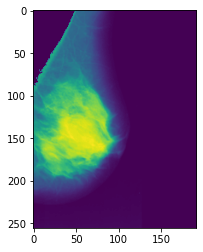

In [3]:
image_data = cv2.imread("mdb001.png", 0)
rg = Region_Growing(image_data, 6200, threshold=40, conn=8)
rg.segment()
result = rg.display_and_resegment()
plt.imshow(result)
plt.show()

#### .jpeg

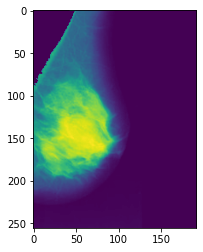

In [4]:
image_data = cv2.imread("mdb001.jpeg", 0)
rg = Region_Growing(image_data, 6200, threshold=40, conn=8)
rg.segment()
result = rg.display_and_resegment()
plt.imshow(result)
plt.show()

#### .jpg

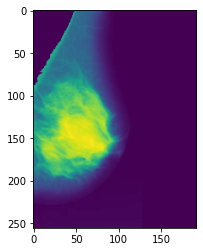

In [5]:
image_data = cv2.imread("mdb001.jpg", 0)
rg = Region_Growing(image_data, 6200, threshold=40, conn=8)
rg.segment()
result = rg.display_and_resegment()
plt.imshow(result)
plt.show()

#### .pgm

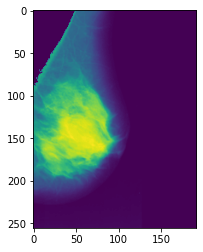

In [6]:
image_data = cv2.imread("mdb001.pgm", 0)
rg = Region_Growing(image_data, 6200, threshold=40, conn=8)
rg.segment()
result = rg.display_and_resegment()
plt.imshow(result)
plt.show()

### Test if value error is raised if conn is not equal to 4 or 8

#### Random Value 1: Conn = 6

In [7]:
image_data = cv2.imread("mdb001.pgm", 0)
rg = Region_Growing(image_data, 6200, threshold=40, conn=6)

ValueError: (__init__) Connectivity type not known (4 or 8 available)!

#### Random Value 2: Conn = 2

In [8]:
image_data = cv2.imread("mdb001.pgm", 0)
rg = Region_Growing(image_data, 6200, threshold=40, conn=2)

ValueError: (__init__) Connectivity type not known (4 or 8 available)!